## Smith-Waterman Alignment

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def smith_waterman(seq1, seq2, match=3, gap=-2):
    m = len(seq1)
    n = len(seq2)
    
    # Initialize score and traceback matrices
    score_matrix = [[0] * (n + 1) for _ in range(m + 1)]
    traceback_matrix = [[""] * (n + 1) for _ in range(m + 1)]
    
    max_score = 0
    max_i, max_j = 0, 0
    
    # Fill in the matrices
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            diagonal_score = score_matrix[i - 1][j - 1] + (match if seq1[i - 1] == seq2[j - 1] else gap)
            up_score = score_matrix[i - 1][j] + gap
            left_score = score_matrix[i][j - 1] + gap
            score_matrix[i][j] = max(0, diagonal_score, up_score, left_score)
            
            # Update traceback matrix
            if score_matrix[i][j] == diagonal_score:
                traceback_matrix[i][j] = "diagonal"
            elif score_matrix[i][j] == up_score:
                traceback_matrix[i][j] = "up"
            elif score_matrix[i][j] == left_score:
                traceback_matrix[i][j] = "left"
            else:
                traceback_matrix[i][j] = "done"
                
            # Track maximum score
            if score_matrix[i][j] > max_score:
                max_score = score_matrix[i][j]
                max_i, max_j = i, j
    
    return score_matrix, traceback_matrix, max_score, max_i, max_j

With random sequence

In [3]:
def generate_random_sequence(length):
    return ''.join(random.choice('ATCG') for _ in range(length))

# Generate synthetic sequences
seq1 = generate_random_sequence(20)
seq2 = generate_random_sequence(20)

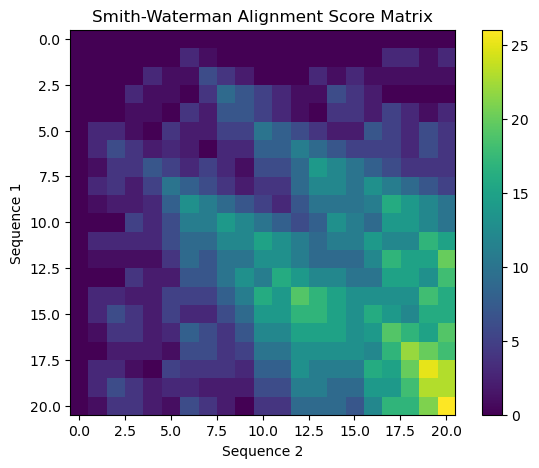

In [4]:
# Perform Smith-Waterman alignment
score_matrix, traceback_matrix, max_score, max_i, max_j = smith_waterman(seq1, seq2)

# Plotting the score matrix
plt.figure(figsize=(7, 5))
plt.title("Smith-Waterman Alignment Score Matrix")
plt.imshow(score_matrix, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.xlabel('Sequence 2')
plt.ylabel('Sequence 1')
plt.show()

In [5]:
score_matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 3],
 [0, 0, 0, 0, 3, 1, 1, 6, 4, 2, 0, 0, 0, 3, 1, 3, 1, 1, 1, 1, 1],
 [0, 0, 0, 3, 1, 1, 0, 4, 9, 7, 5, 3, 1, 1, 6, 4, 2, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 4, 2, 7, 7, 5, 3, 1, 0, 4, 4, 2, 5, 3, 1, 3],
 [0, 3, 3, 1, 0, 4, 2, 2, 5, 5, 10, 8, 6, 4, 2, 2, 7, 5, 3, 6, 4],
 [0, 3, 6, 4, 2, 3, 2, 0, 3, 3, 8, 8, 11, 9, 7, 5, 5, 5, 3, 6, 4],
 [0, 1, 4, 4, 7, 5, 3, 5, 3, 1, 6, 6, 9, 14, 12, 10, 8, 6, 4, 4, 4],
 [0, 3, 4, 2, 5, 10, 8, 6, 4, 2, 4, 4, 9, 12, 12, 10, 13, 11, 9, 7, 5],
 [0, 1, 2, 2, 3, 8, 13, 11, 9, 7, 5, 3, 7, 10, 10, 10, 11, 16, 14, 12, 10],
 [0, 0, 0, 5, 3, 6, 11, 11, 14, 12, 10, 8, 6, 8, 13, 11, 9, 14, 14, 12, 10],
 [0, 3, 3, 3, 3, 6, 9, 9, 12, 12, 15, 13, 11, 9, 11, 11, 14, 12, 12, 17, 15],
 [0, 1, 1, 1, 1, 4, 9, 7, 10, 10, 13, 13, 11, 9, 9, 9, 12, 17, 15, 15, 20],
 [0, 0, 0, 4, 2, 2, 7, 7, 10, 13, 11, 16, 14, 12, 12, 10, 10, 15, 15, 13, 18],
 [0, 3, 3

with specific words

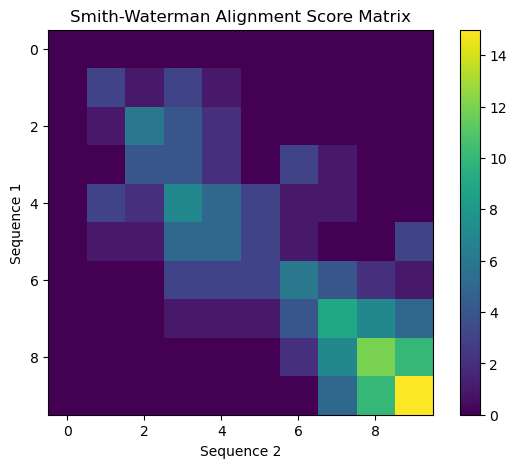

In [6]:
word1='EXTENTION'
word2='EXECUTION'

# Perform Smith-Waterman alignment
score_matrix, traceback_matrix, max_score, max_i, max_j = smith_waterman(word1, word2)
# Plotting the score matrix
plt.figure(figsize=(7, 5))
plt.title("Smith-Waterman Alignment Score Matrix")
plt.imshow(score_matrix, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.xlabel('Sequence 2')
plt.ylabel('Sequence 1')
plt.show()

In [7]:
score_matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 1, 3, 1, 0, 0, 0, 0, 0],
 [0, 1, 6, 4, 2, 0, 0, 0, 0, 0],
 [0, 0, 4, 4, 2, 0, 3, 1, 0, 0],
 [0, 3, 2, 7, 5, 3, 1, 1, 0, 0],
 [0, 1, 1, 5, 5, 3, 1, 0, 0, 3],
 [0, 0, 0, 3, 3, 3, 6, 4, 2, 1],
 [0, 0, 0, 1, 1, 1, 4, 9, 7, 5],
 [0, 0, 0, 0, 0, 0, 2, 7, 12, 10],
 [0, 0, 0, 0, 0, 0, 0, 5, 10, 15]]

In [8]:
max_score

15

## Backtrace Visualization

In [9]:
def smith_waterman_backtrace(seq1, seq2, score_matrix, traceback_matrix, max_i, max_j):
    # Initialize the graph
    G = nx.DiGraph()
    
    # Initialize position variables
    i, j = max_i, max_j
    
    # Termination condition: stop when reaching the edge of the matrix
    while i > 0 and j > 0:
        # Add node for the current position
        G.add_node((i, j))
        
        if traceback_matrix[i][j] == "diagonal":
            # Move diagonally
            i -= 1
            j -= 1
        elif traceback_matrix[i][j] == "up":
            # Move up
            i -= 1
        elif traceback_matrix[i][j] == "left":
            # Move left
            j -= 1
        
        # Add edge to previous position
        G.add_edge((i, j), (i + 1, j + 1))
    
    return G

In [10]:
# Perform Smith-Waterman alignment
score_matrix, traceback_matrix, max_score, max_i, max_j = smith_waterman(word1, word2)

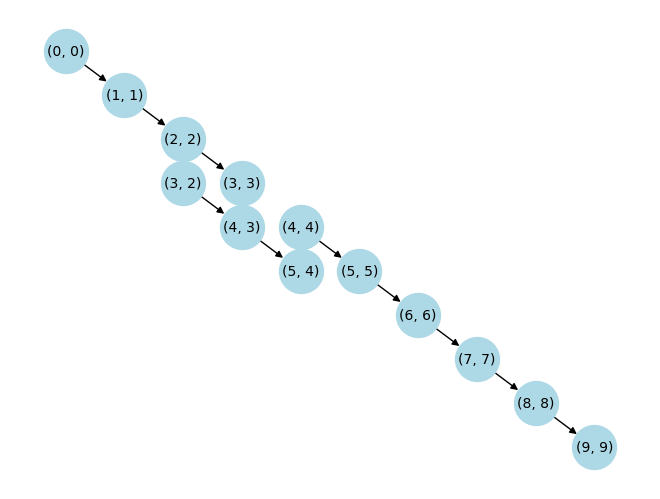

In [11]:
# Generate the backtrace graph
G = smith_waterman_backtrace(word1, word2, score_matrix, traceback_matrix, max_i, max_j)

# Draw the graph
pos = {node: (node[1], -node[0]) for node in G.nodes()}  # Arrange nodes as a grid
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10)
plt.show()